# Projet- 3 : Concevez une application au service de la santé publique

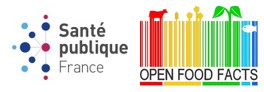

## Introduction 
***
- Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

- **L'idée de l'application :** aide à l'identification des produits à surveiller dans le cas de régime alimentaire liées à la surveillance en utilisant la base d'OpenFood Facts

***

## Environnement

In [1]:
import pandas as pd
import numpy as np
import sys
import warnings
import IPython as ip
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno 
# Configuration pour travail avec fichier python "tools" de fonctions
%load_ext autoreload
%aimport tools

# Set option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Recharger les modules pour la conception des fichiers tools

%autoreload 1

warnings.filterwarnings("ignore")

In [2]:
# Afficher menu
from jyquickhelper import add_notebook_menu
add_notebook_menu()

# Chargement des données

In [3]:
# Import données
data = pd.read_csv('assets/datas/openfoodfacts.csv', sep='\t', low_memory=False)

# Description du jeu de données

In [4]:
# On visualise quelques lignes
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [6]:
# Taille du jeu de données et nombre de variables dubliquées
tools.get_info_data(data)

------------------------------------------------------------------
LES DONNES 

Nombre de lignes : 320772 lignes
Nombre de colonnes : 162 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
Nombre total de données manquantes dans le dataframe : 39608589 données manquantes sur 51965064 (76.22%)


In [7]:
# On liste les colonnes
data.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


-------------------------------------------------------------
Type de variable pour chacune des variables



code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                


----------------------------------------------------------
Répartition des types de variable



,Nombre par type de variable,% des types de variable
float64,106,65.430000
object,56,34.570000


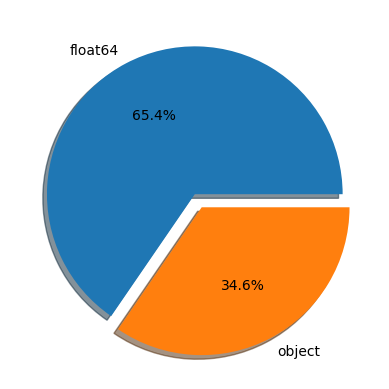

In [9]:
# Informations sur le type des variables
tools.get_types_variables(data,True,True,True)

In [11]:
# Description des varialbles categorielles
tools.get_description_variables(data,type_var='categ')

,count,unique,top,freq
code,320749,320749,0000000003087,1
url,320749,320749,http://world-fr.openfoodfacts.org/produit/0000...,1
creator,320770,3535,usda-ndb-import,169868
created_t,320769,189567,1489077120,20
created_datetime,320763,189568,2017-03-09T10:37:09Z,20
last_modified_t,320772,180495,1439141742,33
last_modified_datetime,320772,180495,2015-08-09T17:35:42Z,33
product_name,303010,221347,Ice Cream,410
generic_name,52795,38584,Pâtes alimentaires au blé dur de qualité supér...,201
quantity,104819,13826,500 g,4669


In [12]:
# Description des variables numériques
tools.get_description_variables(data, type_var='num')

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,248939.0,1.936024,2.502019e+00,0.000000,0.000000e+00,1.000000,3.000000,3.100000e+01
ingredients_from_palm_oil_n,248939.0,0.019659,1.405241e-01,0.000000,0.000000e+00,0.000000,0.000000,2.000000e+00
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,248939.0,0.055246,2.692074e-01,0.000000,0.000000e+00,0.000000,0.000000,6.000000e+00
ingredients_that_may_be_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition_grade_uk,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_100g,261113.0,1141.914605,6.447154e+03,0.000000,3.770000e+02,1100.000000,1674.000000,3.251373e+06
energy-from-fat_100g,857.0,585.501214,7.128099e+02,0.000000,4.940000e+01,300.000000,898.000000,3.830000e+03
fat_100g,243891.0,12.730379,1.757875e+01,0.000000,0.000000e+00,5.000000,20.000000,7.142900e+02


# VISUALISATION DES NA

Nombre total de données manquantes dans le dataframe : 39608589 données manquantes sur 51965064 (76.22%)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



,Nombres de valeurs manquantes,% de valeurs manquantes
water-hardness_100g,320772,100.000000
caproic-acid_100g,320772,100.000000
elaidic-acid_100g,320772,100.000000
nucleotides_100g,320763,100.000000
ingredients_that_may_be_from_palm_oil,320772,100.000000
nutrition_grade_uk,320772,100.000000
serum-proteins_100g,320756,100.000000
maltodextrins_100g,320761,100.000000
maltose_100g,320768,100.000000
nervonic-acid_100g,320772,100.000000


------------------------------------------------------------------
Visualisation des données manquantes


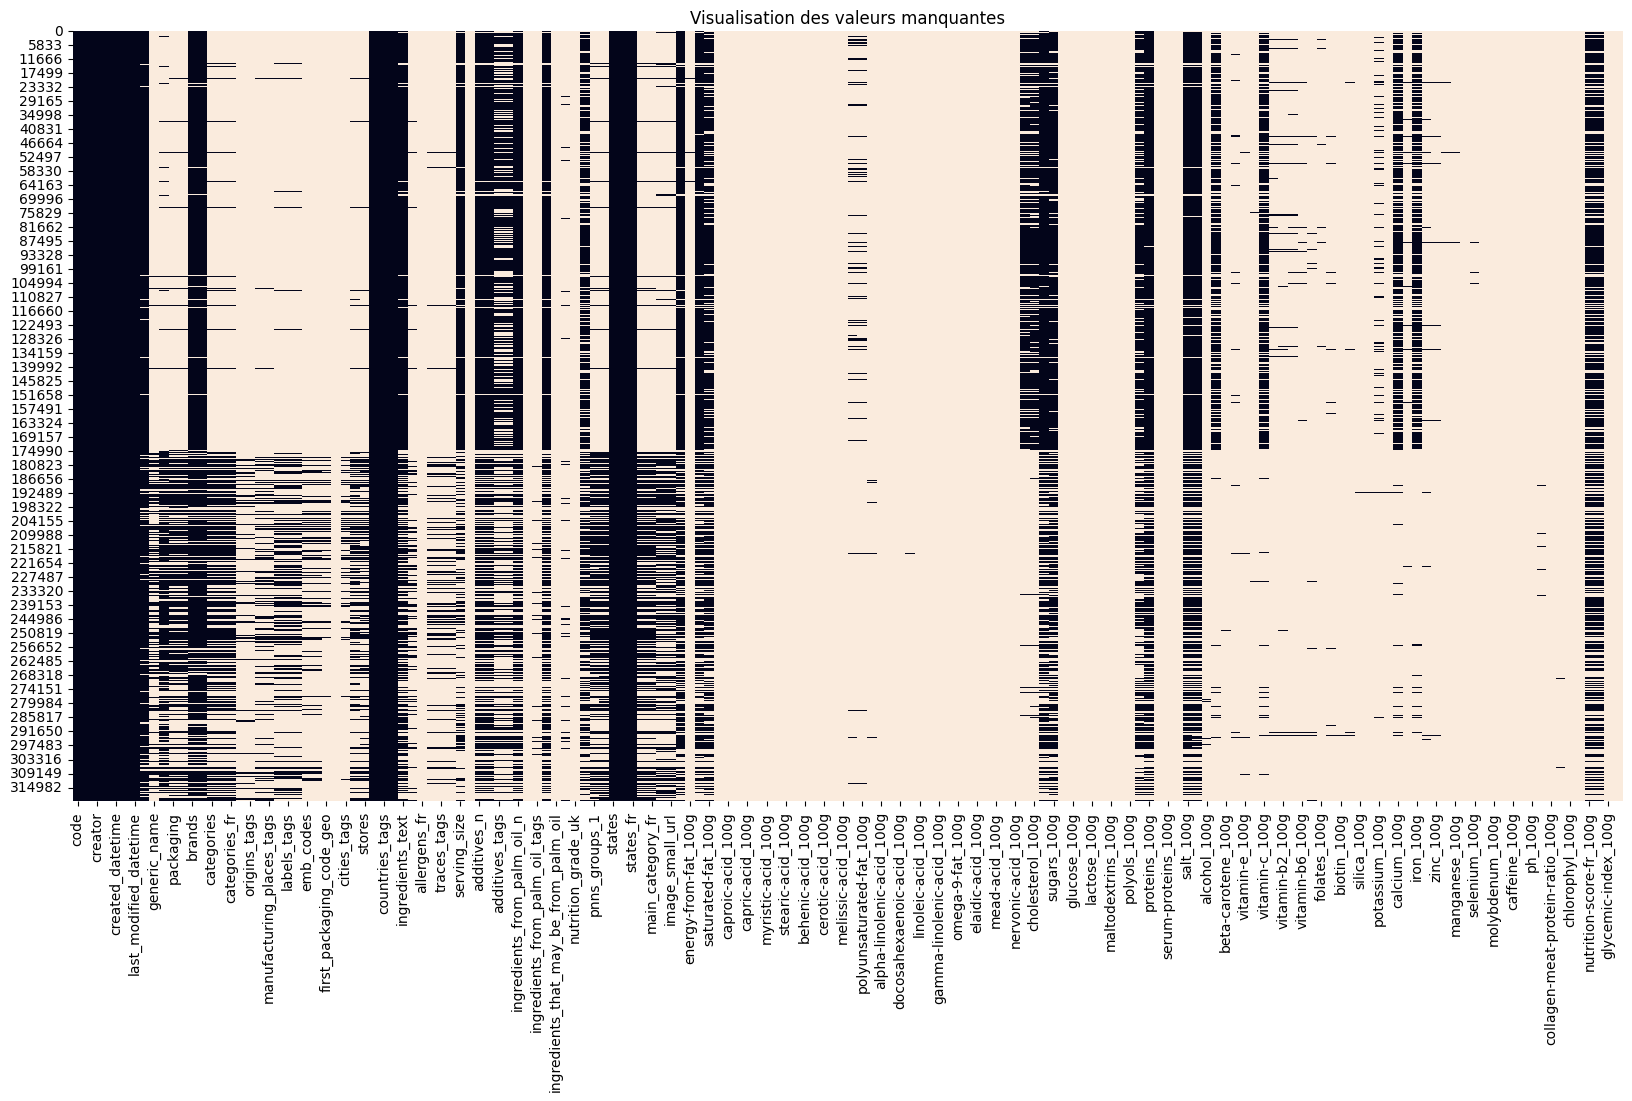

In [13]:
tools.get_missing_value(data,True,True)

# VALEURS MANQUANTES PAR VARIABLE

<function matplotlib.pyplot.show(close=None, block=None)>

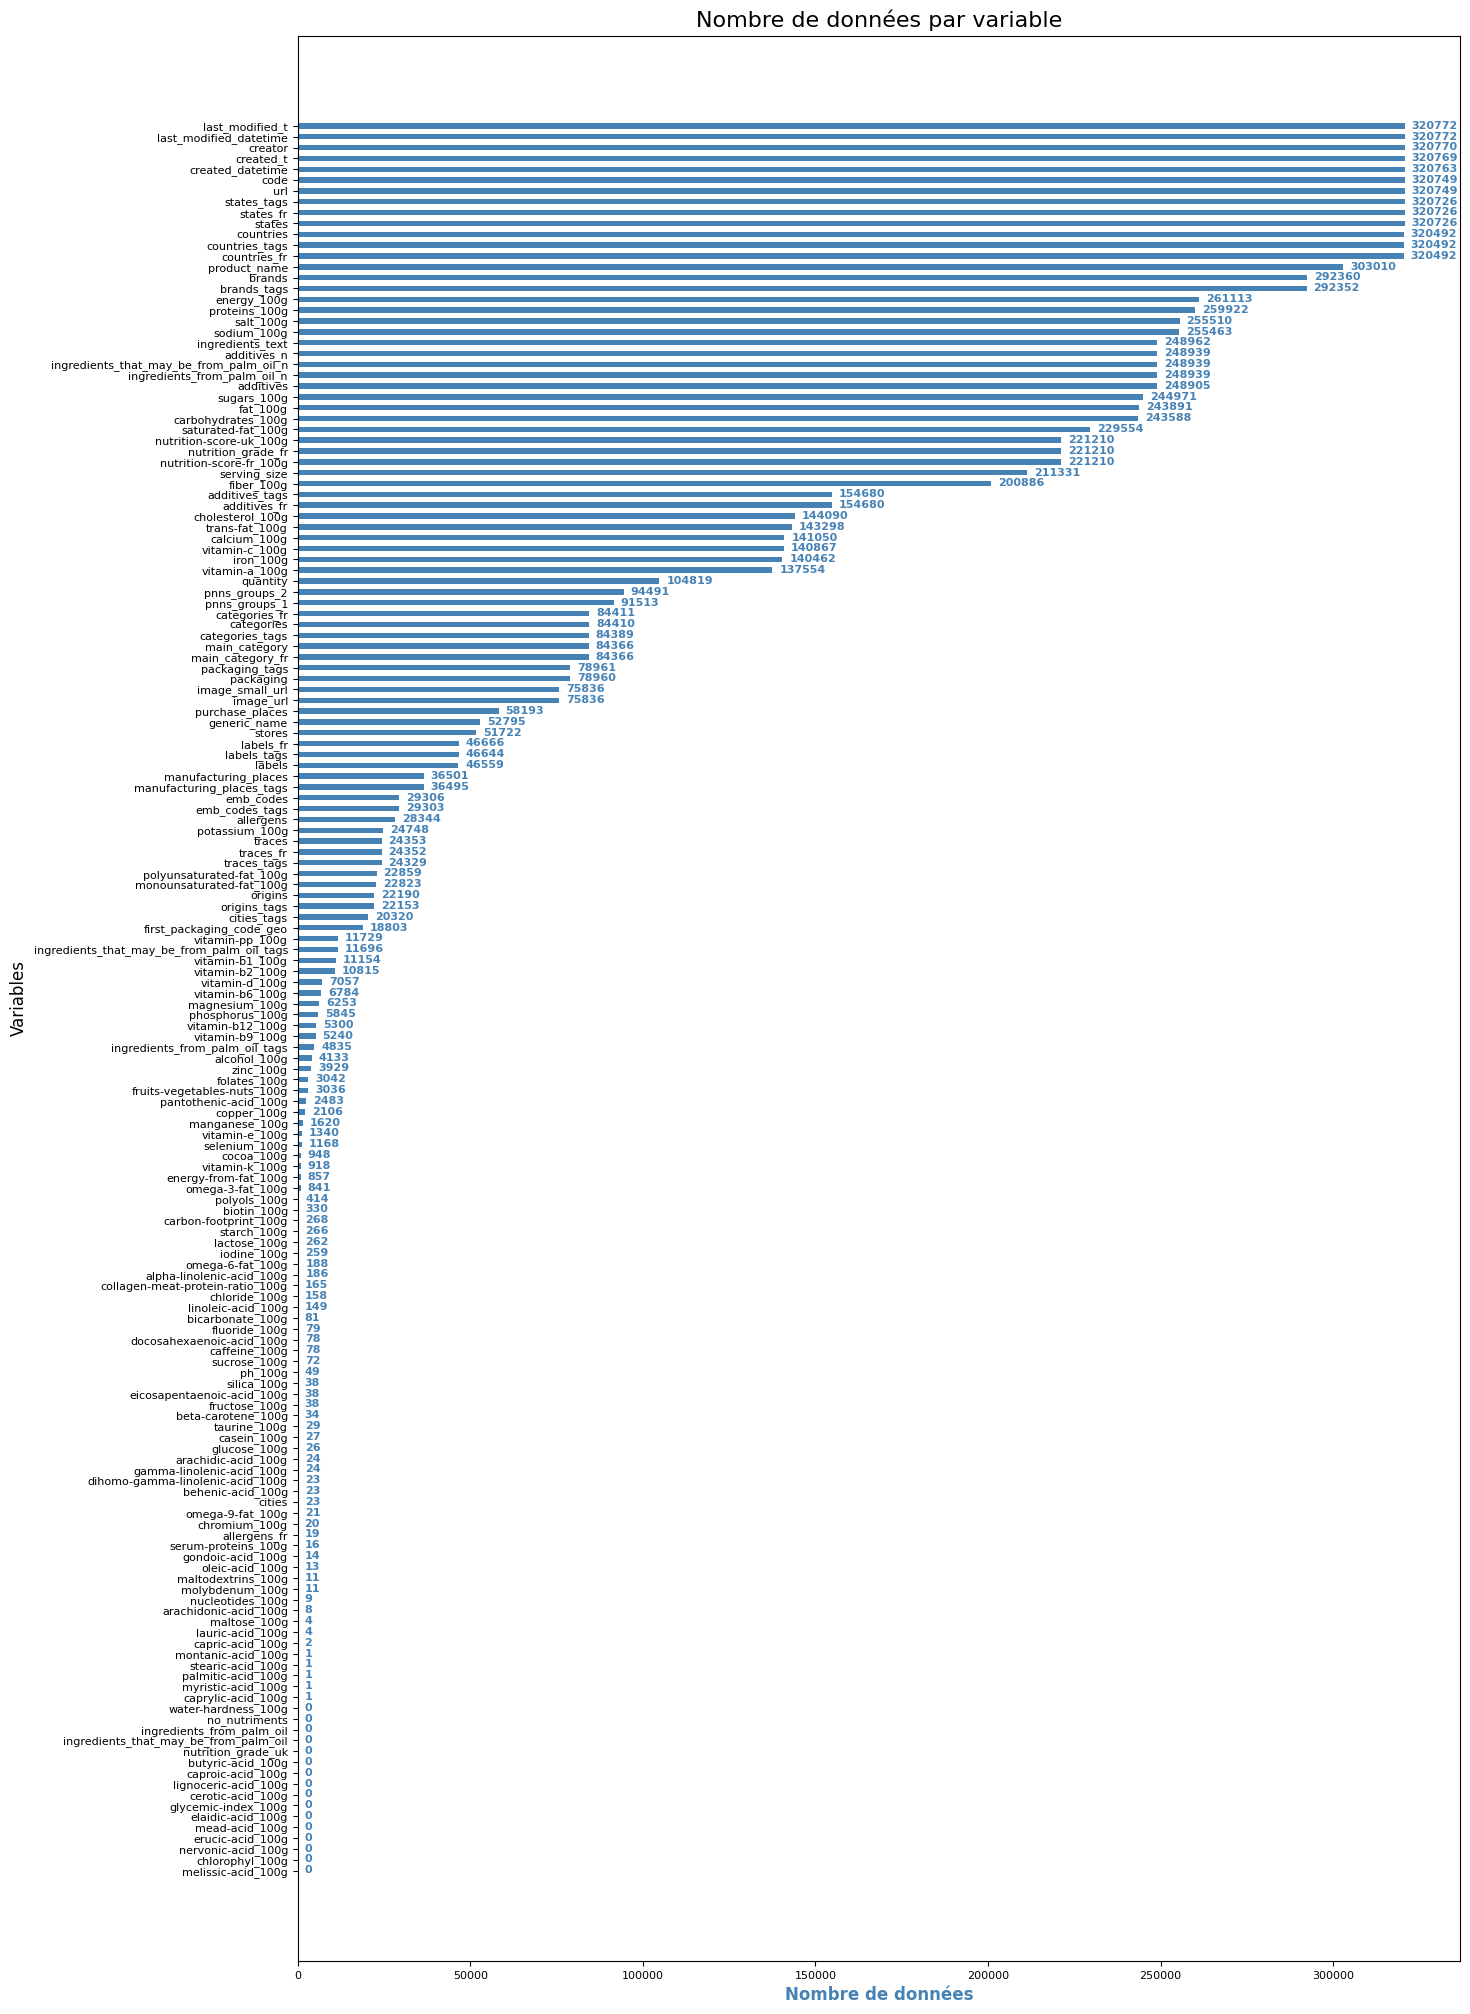

In [79]:
# Remplissage des variables
fig,ax = plt.subplots(figsize=(15, 25))
nb = data.count()
nb.sort_values(inplace=True) 
# On trace le graphique
ax.barh(y=nb.index,
        width=nb.values,
        height=0.5,
        color='steelBlue')
# On ajoute le nombre de valeurs par variable
for i, j in enumerate(nb):
    plt.text(j+2000 , i-.25, str(j), color='SteelBlue',fontsize=8, fontweight='bold')
# On ajuste
ax.set_title('Nombre de données par variable', fontsize=16)
ax.set_xlabel('Nombre de données',color='SteelBlue', fontweight='bold', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
ax.tick_params(labelsize=8)
ax.grid(False)
plt.savefig('assets/graphiques/EDA_1_Nombre de données par variable.jpg', bbox_inches='tight')
plt.show

## %NAN

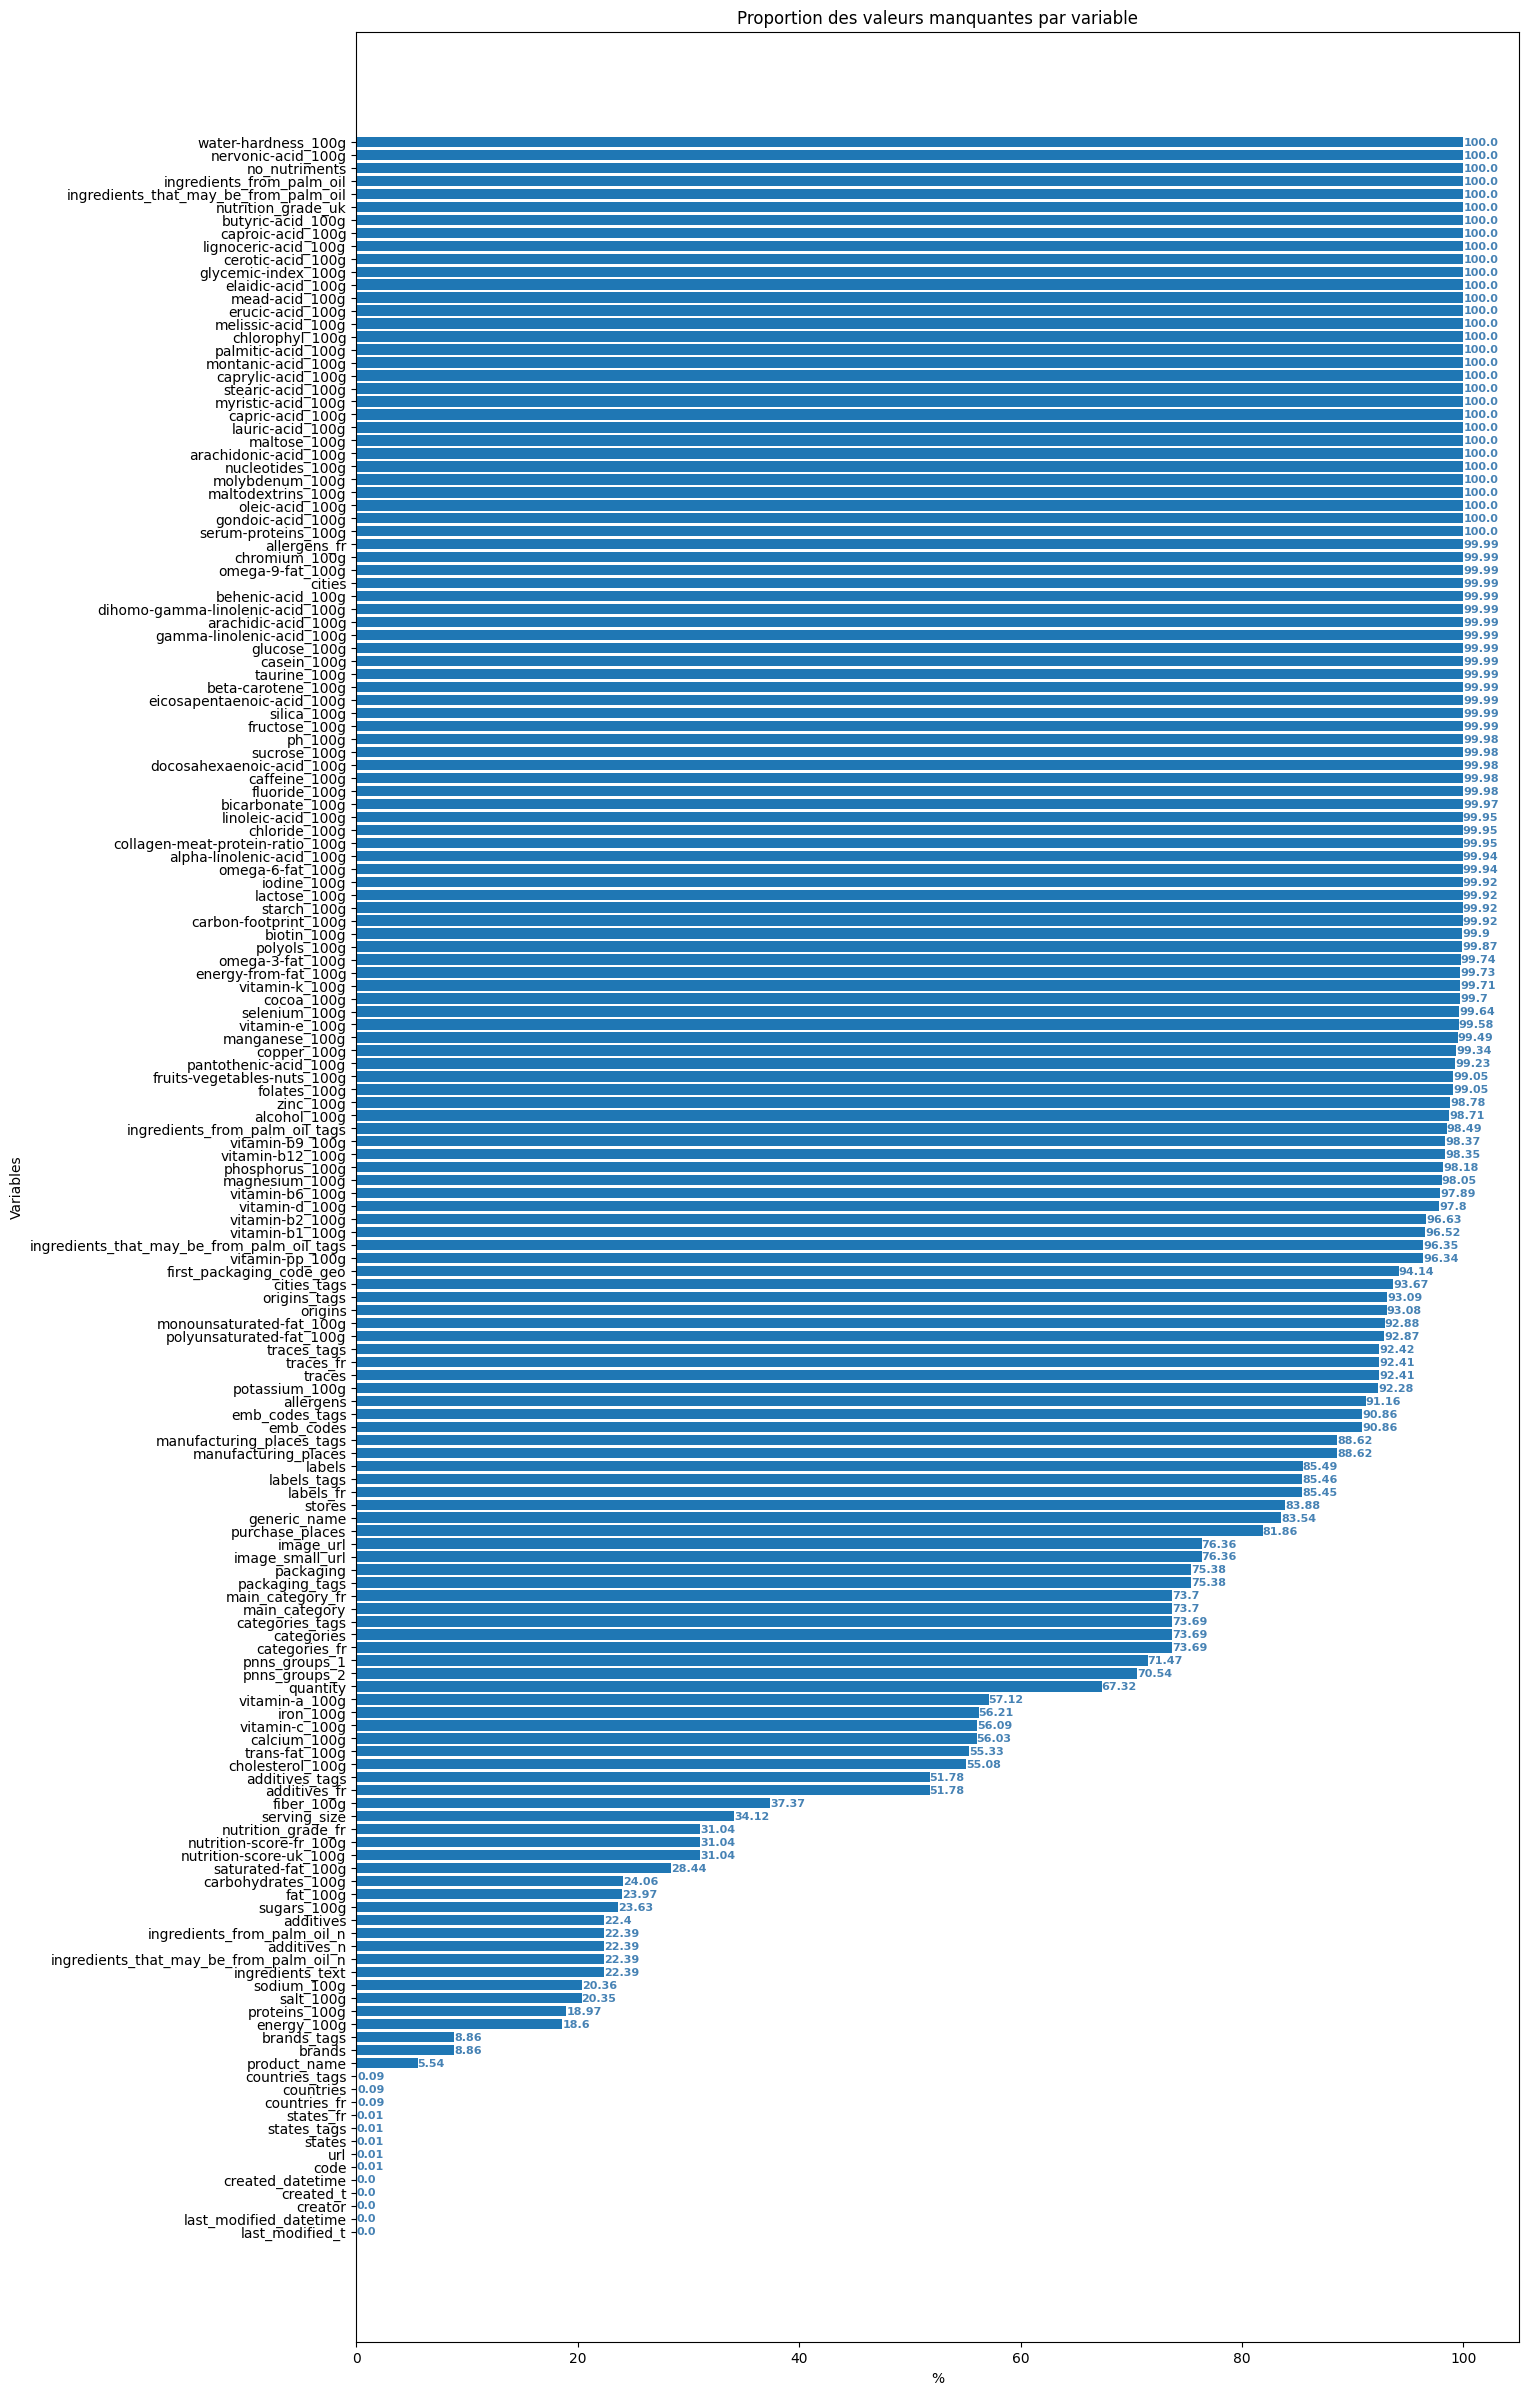

In [90]:
#Taille de la figure
plt.figure(figsize=(15,30))
#Compter et trier le nombre de valeurs manquantes
counts_series = round(data.isnull().mean(axis=0).apply(lambda x: x*100).sort_values(ascending=True),2)
# On dessine le graphique
plt.barh(counts_series.index,counts_series.values)
for i, j in enumerate(counts_series):
    plt.text(j , i-.25, str(j), color='SteelBlue',fontsize=8, fontweight='bold')
#Ajouter titre et labels
plt.title("Proportion des valeurs manquantes par variable")
plt.ylabel("Variables")
plt.xlabel("%")
plt.show()

On les visualise en fonction des 4 sections définies dans la documentation du jeu de données : 
- GENERAL INFORMATION
- TAGS
- INGREDIENTS
- NUTRITION FACTS
    - Partie 1
    - Partie 2

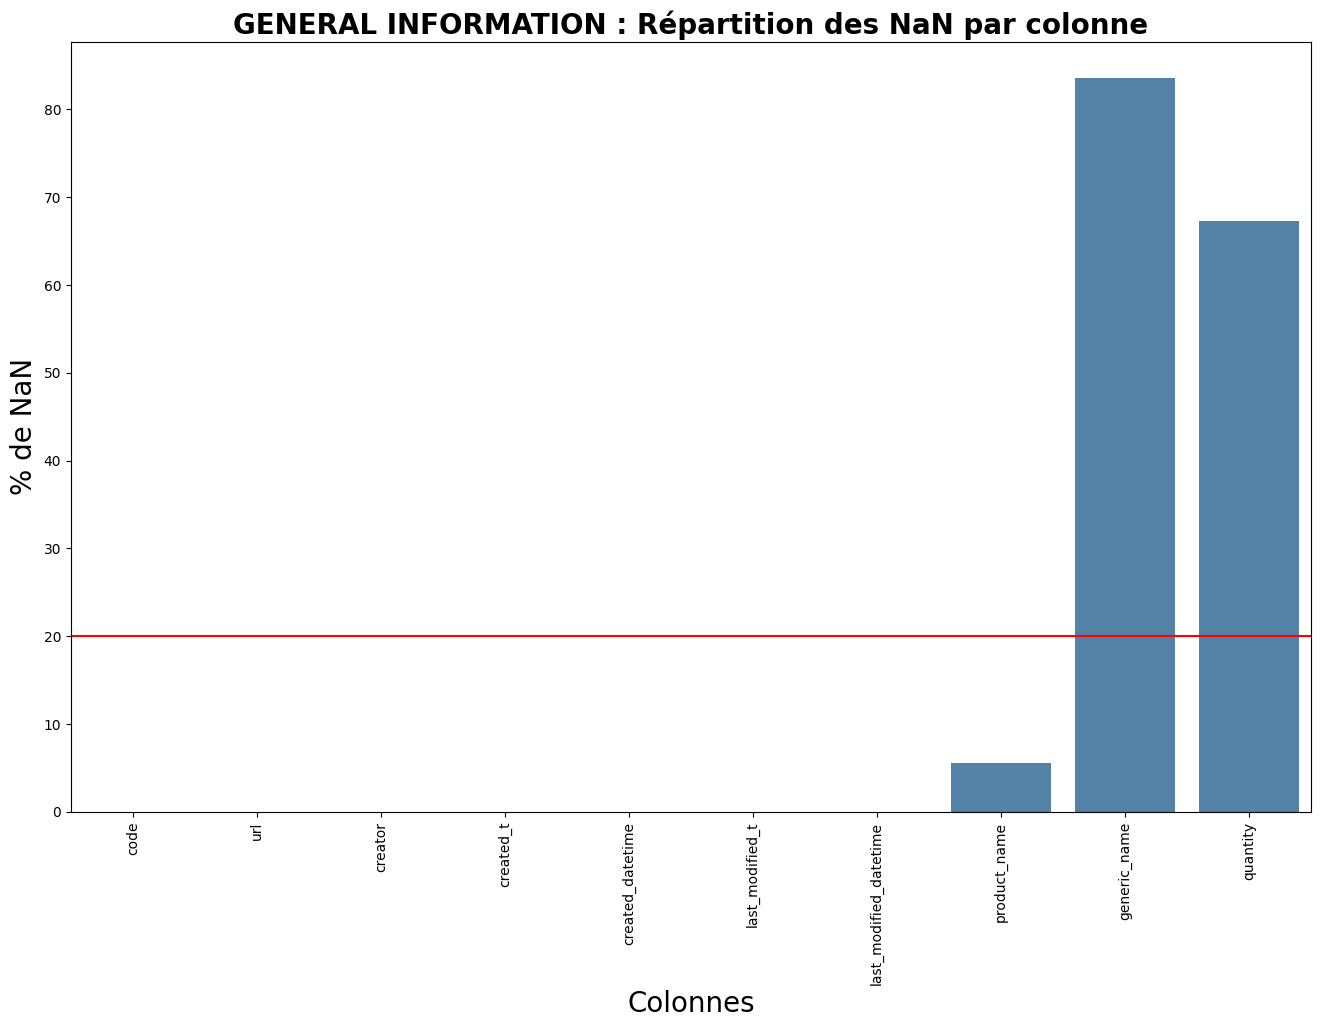

In [178]:
# Les Tags
tools.graph_NAN(data,20,0,10,"GENERAL INFORMATION : Répartition des NaN par colonne")

## CODE

In [224]:
# Doublon
data['code'].duplicated().sum()

22

In [218]:
# On compte les doublons dans les codes qui devrai être unique
doublon_code = data[data.duplicated(['code'],keep=False)]
doublon_code

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,NaN,NaN,NaN,NaN,125 g (1 pot),NaN,6,[ lait-entier -> fr:lait-entier ] [ lait ->...,"en:e1422,en:e440,en:e412,en:e120,en:e160c,en:e101","E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,NaN,NaN,0,NaN,NaN,NaN,b,Milk and dairy products,Milk and yogurt,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:whole-milk-yogurts,Yaourts entiers,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,95.2,NaN,3.2,2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,3.44,NaN,NaN,NaN,0.1630,0.064000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entie

##  Product_name, Generic_Name, Quantity

In [227]:
data['product_name'].nunique()

221347

In [222]:
print(f"Il y a : {doublon_code.shape[0]} doublons dans les codes produits alors qu'ils devraient être unique")

Il y a : 23 doublons dans les codes produits alors qu'ils devraient être unique


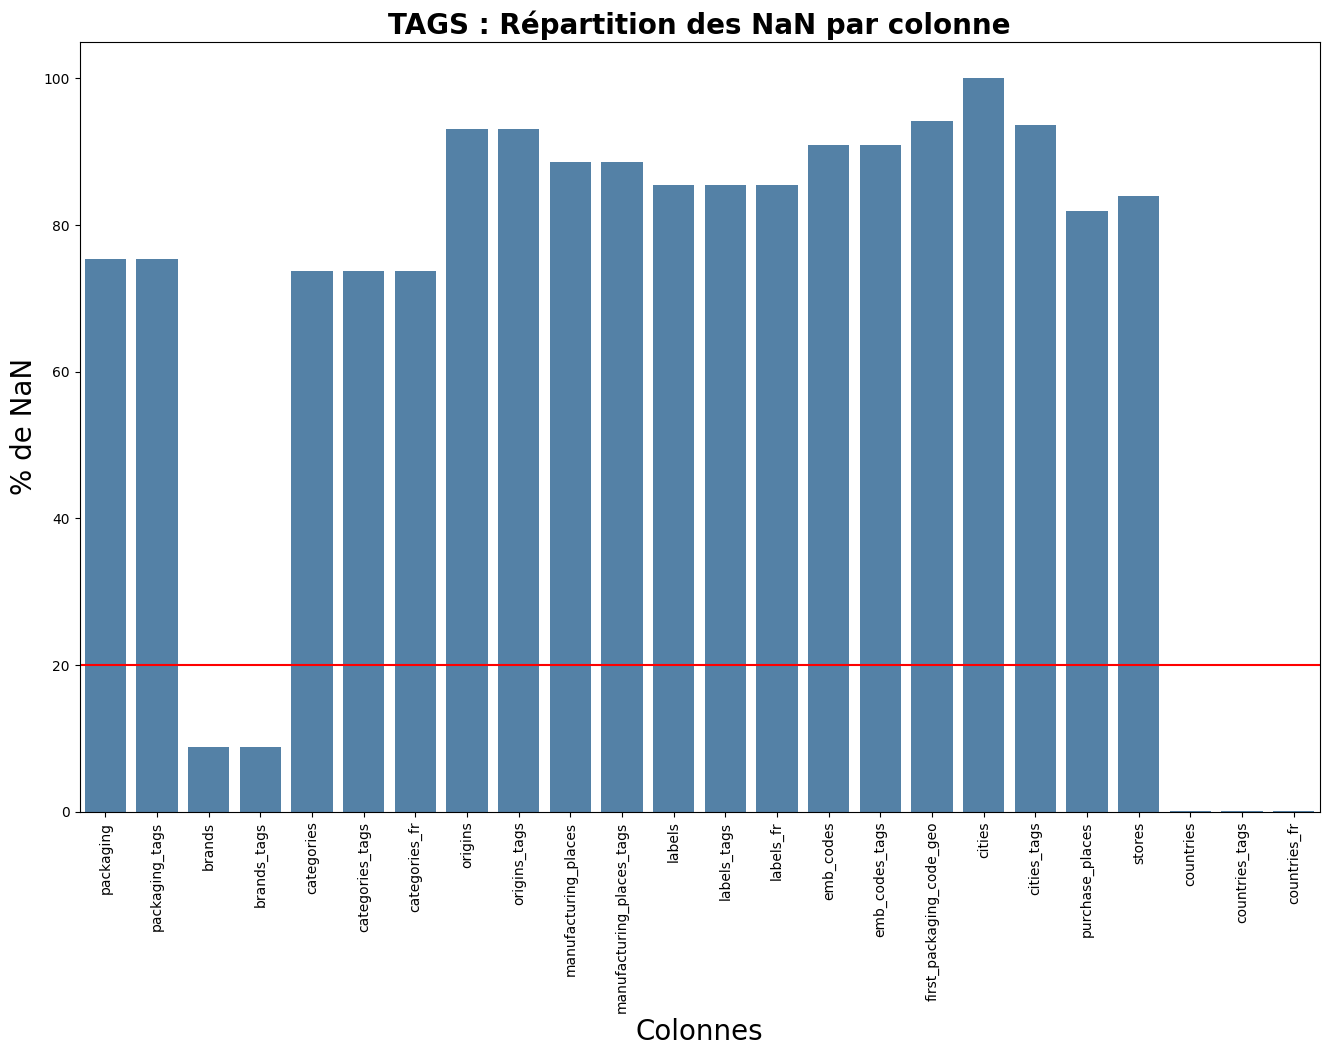

In [200]:
tools.graph_NAN(data,20,10,34,"TAGS : Répartition des NaN par colonne")

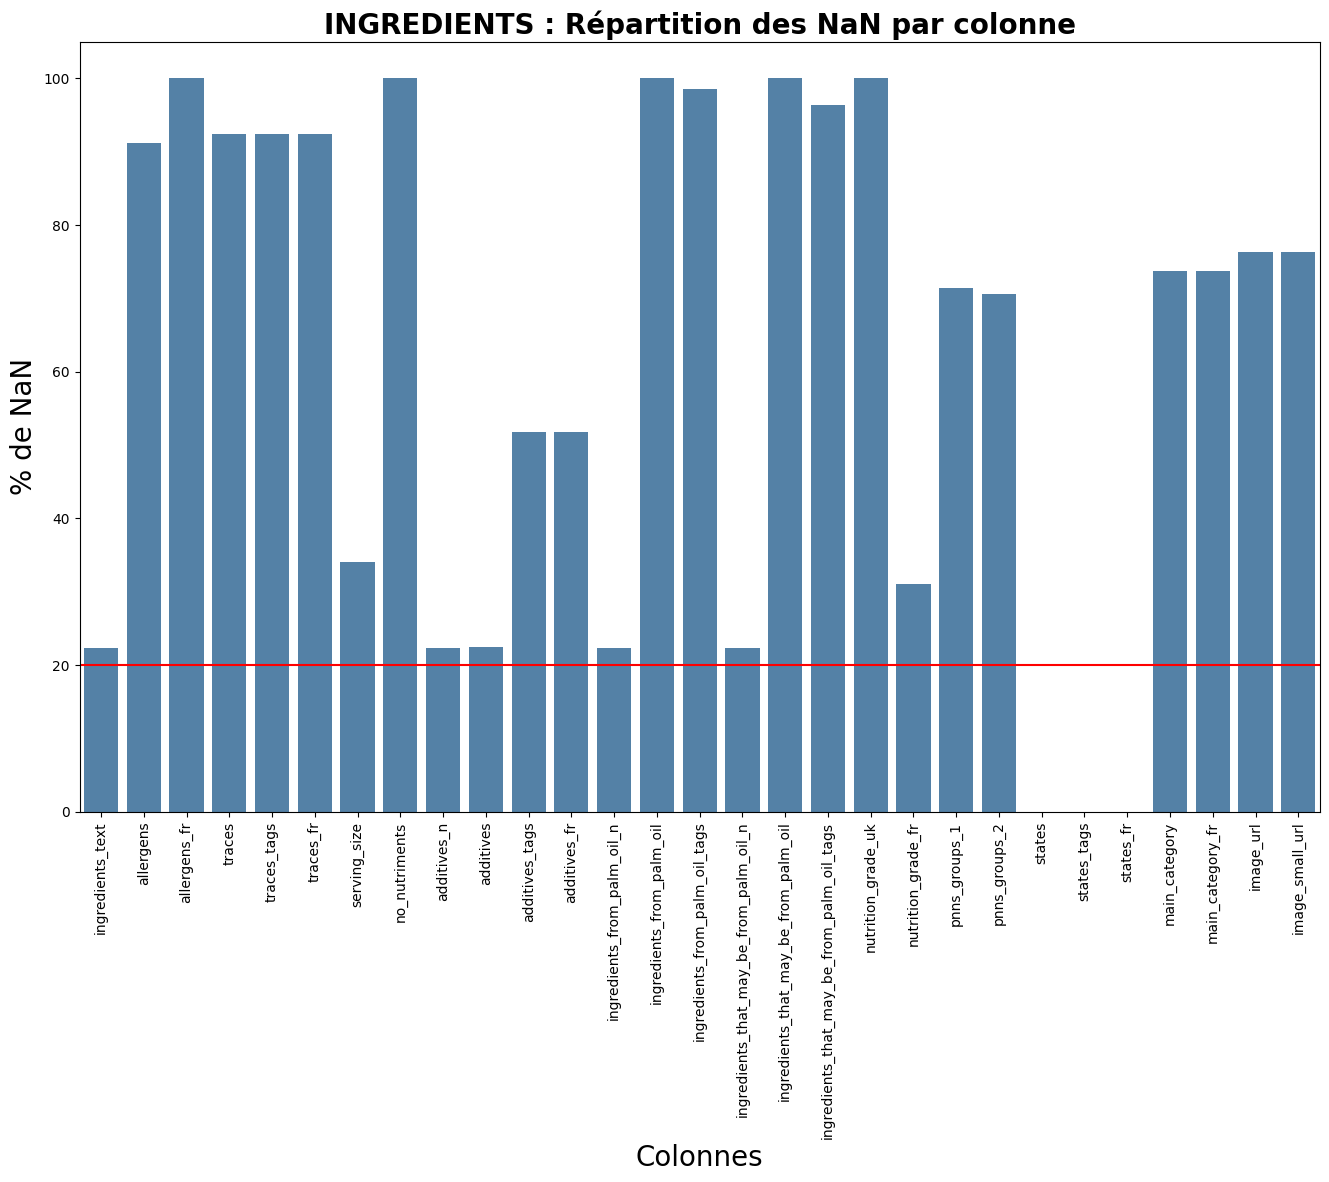

In [192]:
tools.graph_NAN(data,20,34,63,"INGREDIENTS : Répartition des NaN par colonne")

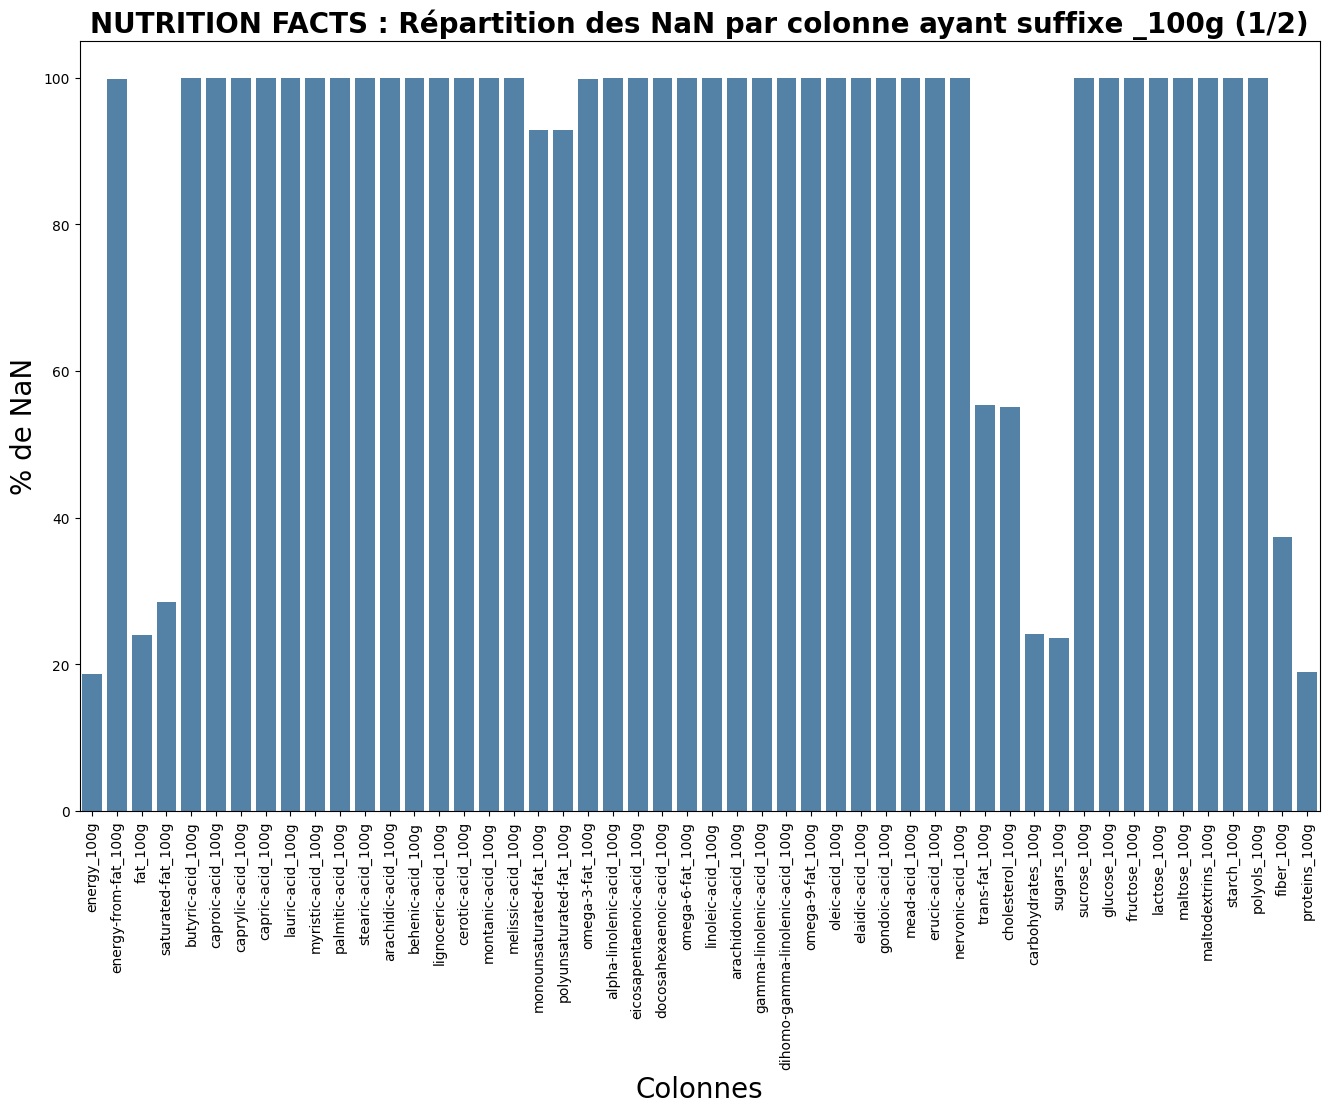

In [207]:
tools.graph_NAN(data,False,63,113,"NUTRITION FACTS : Répartition des NaN par colonne ayant suffixe _100g (1/2)")

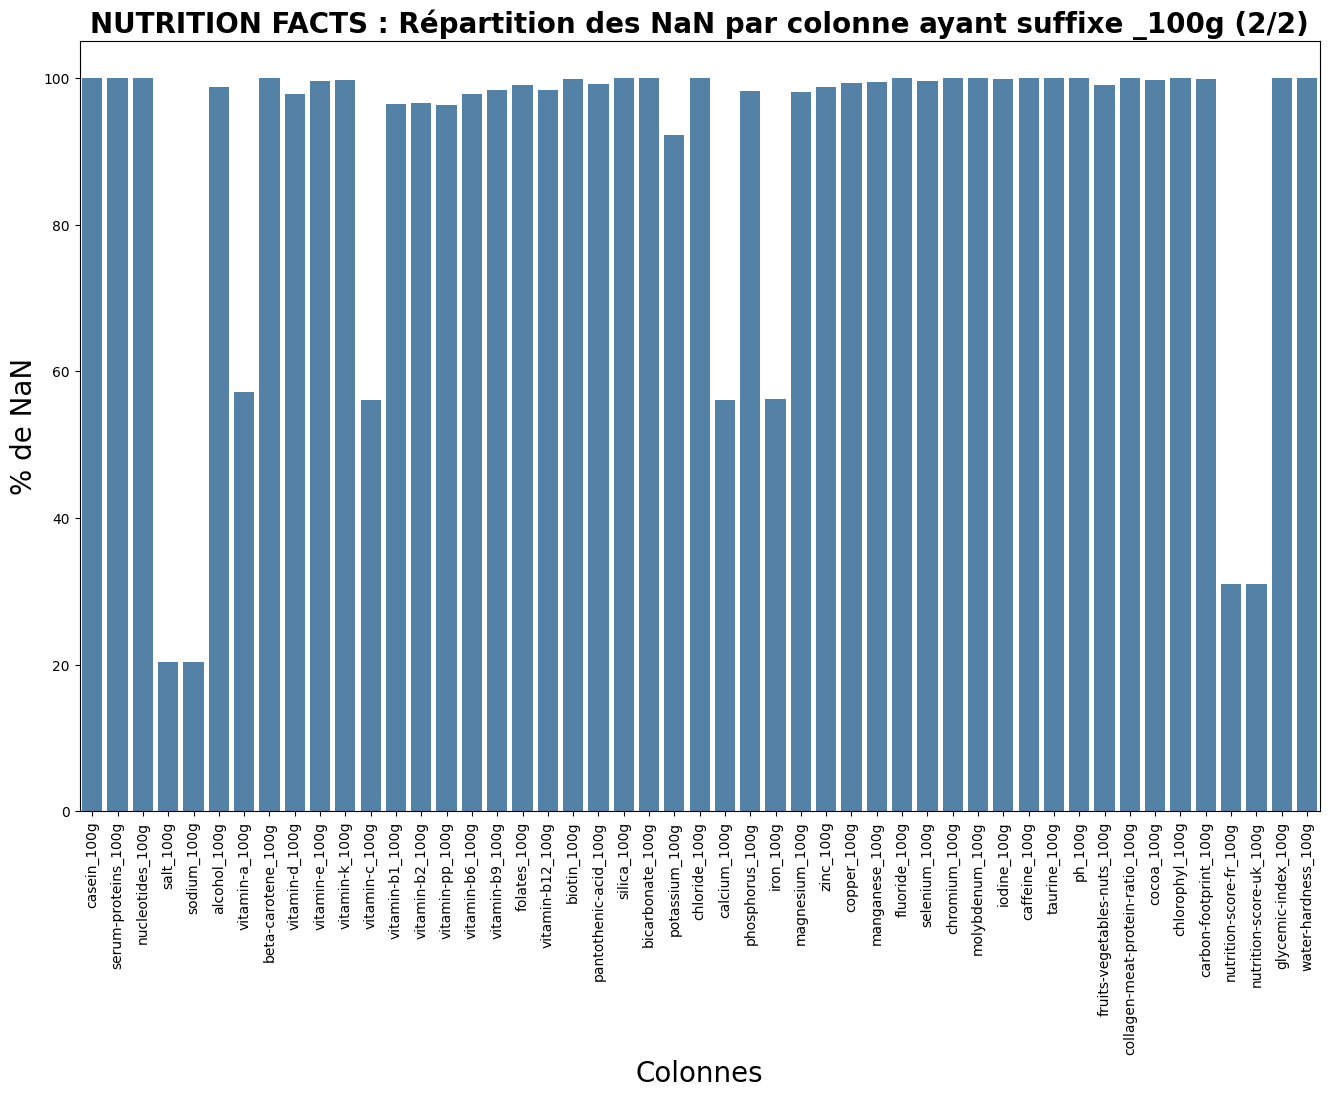

In [208]:
tools.graph_NAN(data,False,113,165,"NUTRITION FACTS : Répartition des NaN par colonne ayant suffixe _100g (2/2)")